# Task-2

## ML model(s) to predict the credit risk(low or high) for a given applicant. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df1=pd.read_csv('data/applicant.csv')
df2=pd.read_csv('data/loan.csv')

Merging Datasets

In [2]:
df=pd.merge(df1, df2, on='applicant_id')
df

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,...,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,...,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,...,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


## Data Pre-processing

Handling categorical variables i.e. converting into dummy variable using One Hot Encoding, dropping some columns and also dealing with null (nan) and different values.

In [3]:
categorical_val=df[['Gender' , 'Marital_status', 'Housing' , 'Employment_status' ,'Savings_account_balance', 'Purpose','Property', 'Other_EMI_plans' , 'Loan_history']]

In [4]:
# One Hot Encoding
dataset = pd.get_dummies(categorical_val) 
dataset.head()

,Gender_female,Gender_male,Marital_status_divorced/separated,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_for free,Housing_own,Housing_rent,Employment_status_management / self-employed / highly qualified employee / officer,...,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate,Other_EMI_plans_bank,Other_EMI_plans_stores,Loan_history_all loans at this bank paid back duly,Loan_history_critical/pending loans at other banks,Loan_history_delay in paying off loans in the past,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Original Dataset
print(df.columns)
print("Data Shape",df.shape,"\n")
# Categorical variables after One Hot Encoding
print(dataset.columns)
print("Data Shape after one hot encoding",dataset.shape)

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')
Data Shape (1000, 27) 

Index(['Gender_female', 'Gender_male', 'Marital_status_divorced/separated',
       'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_stat

In [6]:
# Combining both datasets
data=pd.concat([df,dataset],axis=1)
data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate,Other_EMI_plans_bank,Other_EMI_plans_stores,Loan_history_all loans at this bank paid back duly,Loan_history_critical/pending loans at other banks,Loan_history_delay in paying off loans in the past,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,0,0,1,0,0,0,1,0,0,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,0,0,1,0,0,0,0,0,1,0
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,0,0,1,0,0,0,1,0,0,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,1,0,0,0,0,0,0,0,1,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data.shape

(1000, 63)

In [8]:
# Dropping some columns which are not strongly correlated with target variable.
data_1=data.drop(['Telephone','Gender' , 'Marital_status', 'Housing' , 'Employment_status', 'Savings_account_balance' , 'Purpose','Property', 'Other_EMI_plans' , 'Loan_history'], axis = 1,)

In [9]:
data_1.dtypes

applicant_id                                                                           int64
Primary_applicant_age_in_years                                                         int64
Number_of_dependents                                                                   int64
Years_at_current_residence                                                             int64
Has_been_employed_for_at_least                                                        object
Has_been_employed_for_at_most                                                         object
Foreign_worker                                                                         int64
Balance_in_existing_bank_account_(lower_limit_of_bucket)                              object
Balance_in_existing_bank_account_(upper_limit_of_bucket)                              object
loan_application_id                                                                   object
Months_loan_taken_for                                                 

In [10]:
# Finding number of null values in columns.
data_1.isnull().sum()

applicant_id                                                                            0
Primary_applicant_age_in_years                                                          0
Number_of_dependents                                                                    0
Years_at_current_residence                                                              0
Has_been_employed_for_at_least                                                         62
Has_been_employed_for_at_most                                                         253
Foreign_worker                                                                          0
Balance_in_existing_bank_account_(lower_limit_of_bucket)                              668
Balance_in_existing_bank_account_(upper_limit_of_bucket)                              457
loan_application_id                                                                     0
Months_loan_taken_for                                                                   0
Principal_

In [11]:
# Filling nan values to 0
data_1['Has_been_employed_for_at_least']=data_1['Has_been_employed_for_at_least'].fillna(0)
data_1['Has_been_employed_for_at_most']= data_1['Has_been_employed_for_at_most'].fillna(0)

In [12]:
# Dropping the nan values 
data_1['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=data_1['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].fillna(0)
data_1['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=data_1['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].fillna(0)
# Replacing the string values with integer values.
data_1['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=data_1['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].replace('2 lac',200000)
data_1['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=data_1['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].replace('2 lac',200000)

In [13]:
# Changing object column (Has_been_employed_for_at_least, Has_been_employed_for_at_most) to integer.
data_1['Has_been_employed_for_at_least']=data_1.Has_been_employed_for_at_least.str.extract('(\d{1,})').fillna(-1).astype(int)
data_1['Has_been_employed_for_at_most']=data_1.Has_been_employed_for_at_most.str.extract('(\d{1,})').fillna(-1).astype(int)

In [14]:
# Final Dataset
data_1

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,...,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate,Other_EMI_plans_bank,Other_EMI_plans_stores,Loan_history_all loans at this bank paid back duly,Loan_history_critical/pending loans at other banks,Loan_history_delay in paying off loans in the past,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly
0,1469590,67,1,4,7,-1,1,0,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,...,0,0,1,0,0,0,1,0,0,0
1,1203873,22,1,2,1,4,1,0,200000,d68d989e-edad-11ea-b1d5-2bcf65006448,...,0,0,1,0,0,0,0,0,1,0
2,1432761,49,2,3,4,7,1,0,0,d68d995c-edad-11ea-814a-1b6716782575,...,0,0,1,0,0,0,1,0,0,0
3,1207582,45,2,4,4,7,1,0,0,d68d99fc-edad-11ea-8841-17e8848060ae,...,1,0,0,0,0,0,0,0,1,0
4,1674436,53,2,4,1,4,1,0,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,1,4,4,7,1,0,0,d68fbba6-edad-11ea-80fe-30b2f9300e3d,...,0,0,1,0,0,0,0,0,1,0
996,1114064,40,1,4,1,4,1,0,0,d68fbc28-edad-11ea-bc62-4240ac0824fa,...,1,0,0,0,0,0,0,0,1,0
997,1758046,38,1,4,7,-1,1,0,0,d68fbcaa-edad-11ea-aafc-2de1139e42cd,...,0,1,0,0,0,0,0,0,1,0
998,1824545,23,1,4,1,4,1,0,0,d68fbd2c-edad-11ea-b49e-2894666f2df6,...,0,0,0,0,0,0,0,0,1,0


## Model Building

In [15]:
# Splitting dataset into training and testing by 80% and 20% respectively.
from sklearn.model_selection import train_test_split

X = data_1.drop(['high_risk_applicant','applicant_id','loan_application_id'], axis=1)
y = data_1.high_risk_applicant

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify = y,random_state=0)

In [16]:
# Model evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:  
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}")
        print("_______________________________________________")
        print(f"Training Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%\n")
        
    elif train==False:  
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}")
        print("_______________________________________________")
        print(f"Testing Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%\n")

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)

print("Intercept",lr_clf.intercept_)
print("Coefficients",lr_clf.coef_,"\n")

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Intercept [-2.77880328e-10]
Coefficients [[-1.13218078e-08 -3.26566184e-10 -8.12416603e-10 -1.12518028e-09
  -8.14381161e-10 -2.52515397e-10 -5.41576446e-06 -1.41157981e-07
  -1.86243359e-09 -9.89853861e-08 -8.06015237e-10  1.01859656e-11
  -2.43957424e-11 -4.12936433e-10 -4.83072702e-11 -2.29573058e-10
  -1.14035775e-12 -4.83072702e-11 -3.71311928e-11 -1.91301507e-10
  -4.06493656e-12 -2.68797274e-10 -5.01811759e-12 -1.17223067e-11
  -1.83007145e-10 -4.94144786e-12 -7.82094282e-11 -4.03291782e-11
  -9.02339243e-11 -2.27952907e-11 -2.87960552e-11 -4.67544655e-11
   9.72344628e-13 -8.31874519e-12 -1.81837046e-12  5.87742261e-12
  -1.58158849e-10 -1.71819516e-11 -3.66604080e-12 -5.42502192e-11
  -4.28271956e-11 -8.57862205e-11 -1.57137221e-10  1.31709614e-12
   5.74823755e-12  2.52404902e-11 -1.85863210e-10 -8.98557830e-12
  -1.30806955e-10  2.25349258e-11]] 

Train Result:
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.700000    0.

C:\Users\DELL\Anaconda3\envs\arthenvnew\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\envs\arthenvnew\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\envs\arthenvnew\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D

In [18]:
# Correlation score
Rsquare=lr_clf.score(X_train, y_train)
print('Rsquare =',Rsquare)

Rsquare = 0.7


In [19]:
# Model test and train score.
lr_test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
lr_test_score
lr_train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100
lr_train_score

70.0

Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier(max_depth = 10,random_state=0)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.919786    0.815900   0.88875    0.867843      0.888620
recall       0.921429    0.812500   0.88875    0.866964      0.888750
f1-score     0.920607    0.814196   0.88875    0.867401      0.888683
support    560.000000  240.000000   0.88875  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[516  44]
 [ 45 195]]
_______________________________________________
Training Accuracy Score: 88.88%

Test Result:
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.721088   0.358491     0.625    0.539790      0.612309
recall       0.757143   0.316667     0.625    0.536905      0.625000
f1-score     0.738676   0.336283     0.625    0.537480      0.617958
support    140.000000  60.000000     0.625  200.000000    200.000000
_______________________________________________
Confusion Ma

In [21]:
# Model test and train score.
tree_test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
tree_test_score
tree_train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100
tree_train_score

88.875

Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    560.0  240.0       1.0      800.0         800.0
_______________________________________________
Confusion Matrix: 
 [[560   0]
 [  0 240]]
_______________________________________________
Training Accuracy Score: 100.00%

Test Result:
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.734463   0.565217     0.715    0.649840      0.683690
recall       0.928571   0.216667     0.715    0.572619      0.715000
f1-score     0.820189   0.313253     0.715    0.566721      0.668108
support    140.000000  60.000000     0.715  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[130  10]
 [ 47  13]]
_______________________

In [23]:
# Model test and train score.
rf_test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
rf_test_score
rf_train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100
rf_train_score

100.0

Support Vector Machine Classifier

In [24]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.712258    0.680000   0.71125    0.696129      0.702581
recall       0.985714    0.070833   0.71125    0.528274      0.711250
f1-score     0.826966    0.128302   0.71125    0.477634      0.617367
support    560.000000  240.000000   0.71125  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[552   8]
 [223  17]]
_______________________________________________
Training Accuracy Score: 71.12%

Test Result:
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.710526   0.500000       0.7    0.605263      0.647368
recall       0.964286   0.083333       0.7    0.523810      0.700000
f1-score     0.818182   0.142857       0.7    0.480519      0.615584
support    140.000000  60.000000       0.7  200.000000    200.000000
_______________________________________________
Confusion Ma

In [25]:
# Model test and train score.
svm_test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
svm_test_score
svm_train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100
svm_train_score

71.125

## Comparing all the models

In [26]:
results_df = pd.DataFrame(data=[["Logistic Regression", lr_train_score, lr_test_score],
                               ["Decision Tree", tree_train_score, tree_test_score],
                               ["Random Forest", rf_train_score, rf_test_score],
                               ["Support Vector Machine (SVM)", svm_train_score, svm_test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,70.000,70.0
1,Decision Tree,88.875,62.5
2,Random Forest,100.000,71.5
3,Support Vector Machine (SVM),71.125,70.0


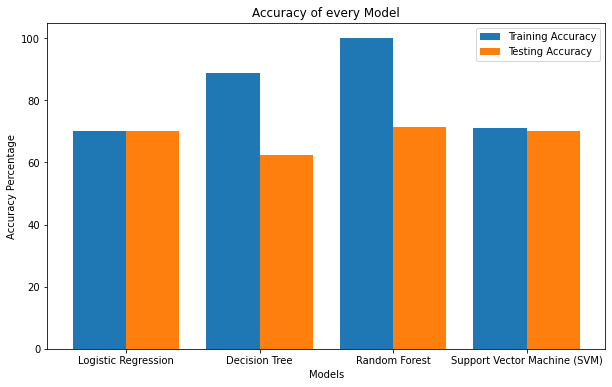

In [27]:
X_axis = np.arange(len(results_df["Model"]))
fig = plt.figure(figsize = (10, 6))
plt.bar(X_axis - 0.2, results_df["Training Accuracy %"], 0.4, label = 'Training Accuracy')
plt.bar(X_axis + 0.2, results_df["Testing Accuracy %"], 0.4, label = 'Testing Accuracy')
plt.xticks(X_axis, results_df["Model"])
plt.xlabel("Models")
plt.ylabel("Accuracy Percentage")
plt.title("Accuracy of every Model")
plt.legend()
plt.show()